# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [3]:
# Import relevant libraries
import pandas as pd
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [4]:
# Set up Selenium
service = Service(executable_path='C:\\Users\\conne\\.wdm\\drivers\\chromedriver\\win64\\122.0.6261.57\\chromedriver-win32/chromedriver.exe')
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=options)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
driver.get(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [6]:
# Create a Beautiful Soup Object
# Get the HTML content of the page
html_content = driver.page_source

# Parse HTML using BeautifulSoup
page_soup = BeautifulSoup(html_content, "html.parser")

In [7]:
# Extract all rows of data
# Scrape the data from the HTML table
table = page_soup.find("table")
df = pd.read_html(str(table))[0]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
# Extract all rows of data
rows = table.find_all("tr")

# Create lists to store data
ids = []
terrestrial_dates = []
sols = []
ls_values = []
months = []
min_temps = []
pressures = []

# Loop through rows to extract data
for row in rows[1:]:  # Skip the header row (index 0)
    # Extract data from each cell in the row
    cells = row.find_all("td")
    
    # Extract data from cells
    id_ = cells[0].text.strip()
    terrestrial_date = cells[1].text.strip()
    sol = cells[2].text.strip()
    ls_value = cells[3].text.strip()
    month = cells[4].text.strip()
    min_temp = cells[5].text.strip()
    pressure = cells[6].text.strip()
    
    # Append data to lists
    ids.append(id_)
    terrestrial_dates.append(terrestrial_date)
    sols.append(sol)
    ls_values.append(ls_value)
    months.append(month)
    min_temps.append(min_temp)
    pressures.append(pressure)

# Create DataFrame
df = pd.DataFrame({
    'id': ids,
    'terrestrial_date': terrestrial_dates,
    'sol': sols,
    'ls': ls_values,
    'month': months,
    'min_temp': min_temps,
    'pressure': pressures
})

# Display the DataFrame
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [8]:
# Confirm DataFrame was created successfully


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine the data types of each column
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                       object
min_temp                   float64
pressure                   float64
dtype: object


In [13]:
# Change data types for data analysis
# Convert data types as needed
# For example, convert 'terrestrial_date' to datetime, 'sol' to int, 'ls' to float, 'min_temp' to float, 'pressure' to float
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(float)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [14]:
# Confirm type changes were successful by examining data types again
# Display the updated DataFrame
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                       object
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print("Number of months on Mars:", num_months)

Number of months on Mars: 12


In [16]:
# 2. How many Martian days' worth of data are there?
num_martian_days = df['sol'].nunique()
print("Number of Martian days worth of data:", num_martian_days)

Number of Martian days worth of data: 1867


In [21]:
# 3. What is the average low temperature by month?
# Calculate the average minimum daily temperature for each month
min_temp_by_month = df.groupby('month')['min_temp'].mean()
print(min_temp_by_month)

month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


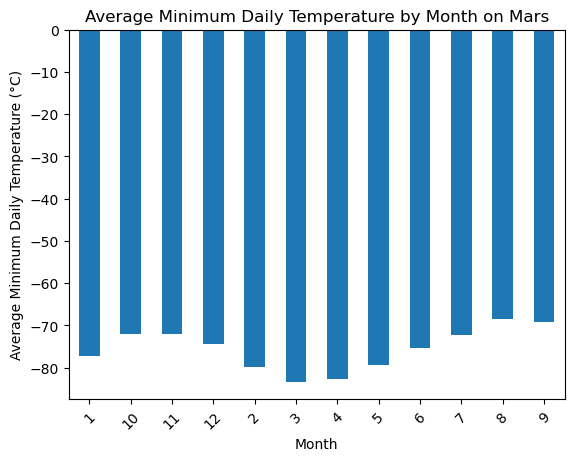

In [22]:
# Plot the average temperature by month
min_temp_by_month.plot(kind='bar')
plt.title('Average Minimum Daily Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Daily Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Identify the coldest and hottest months in Curiosity's location
# Find the coldest month
coldest_month = min_temp_by_month.idxmin()

# Find the hottest month
hottest_month = min_temp_by_month.idxmax()

print("Coldest month:", coldest_month)
print("Hottest month:", hottest_month)


Coldest month: 3
Hottest month: 8


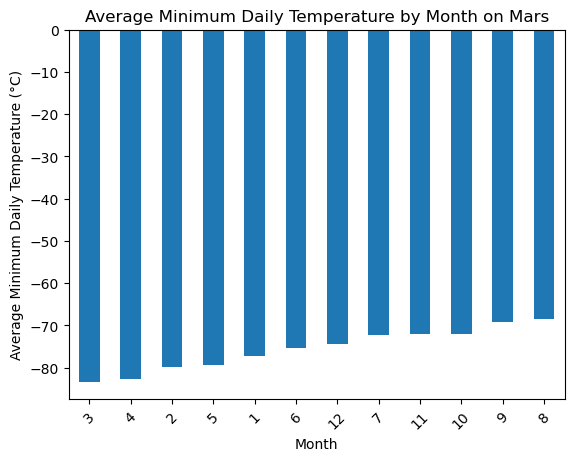

In [24]:
# Sort the series by values (temperature) in ascending order
sorted_min_temp_by_month = min_temp_by_month.sort_values()

# Plot the results as a bar chart
sorted_min_temp_by_month.plot(kind='bar')
plt.title('Average Minimum Daily Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Daily Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

In [26]:
# 4. Average pressure by Martian month
# Calculate the average daily atmospheric pressure for each month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
print(avg_pressure_by_month)

month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64


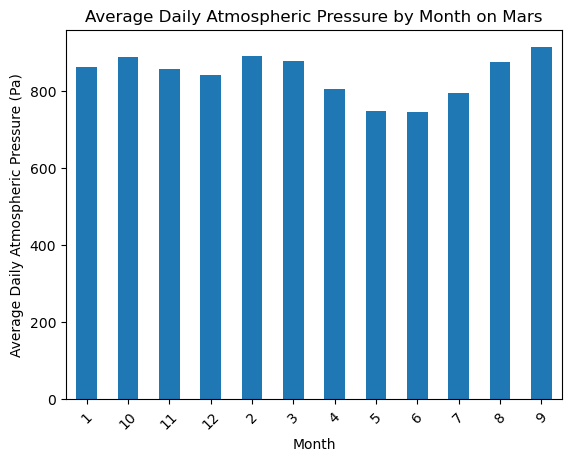

In [27]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar')
plt.title('Average Daily Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Daily Atmospheric Pressure (Pa)')
plt.xticks(rotation=45)
plt.show()

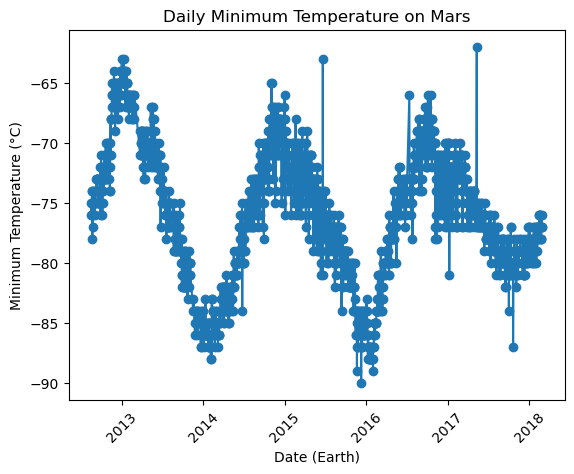

In [28]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature
plt.plot(df['terrestrial_date'], df['min_temp'], marker='o', linestyle='-')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Date (Earth)')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [29]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)

In [31]:
driver.quit()